# RNN
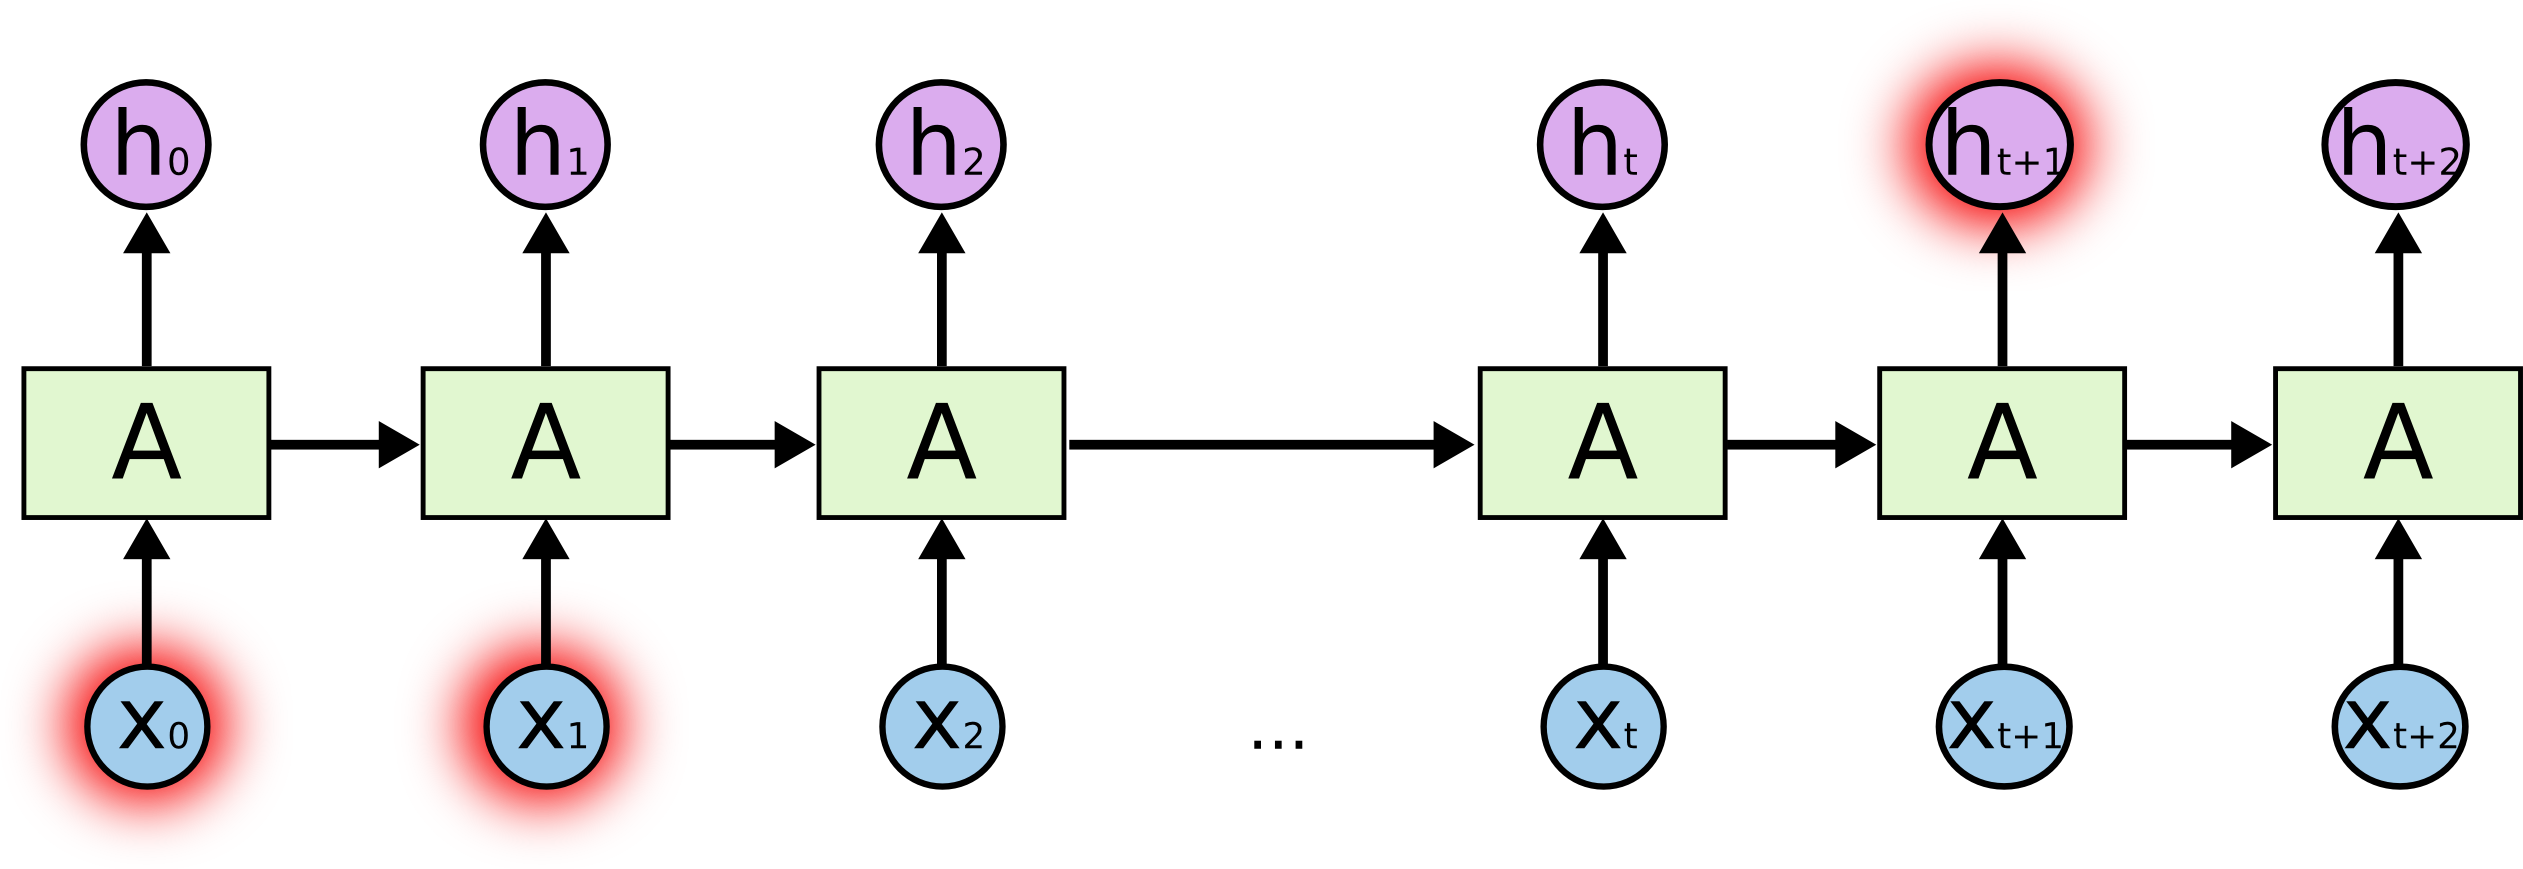

# LSTMs
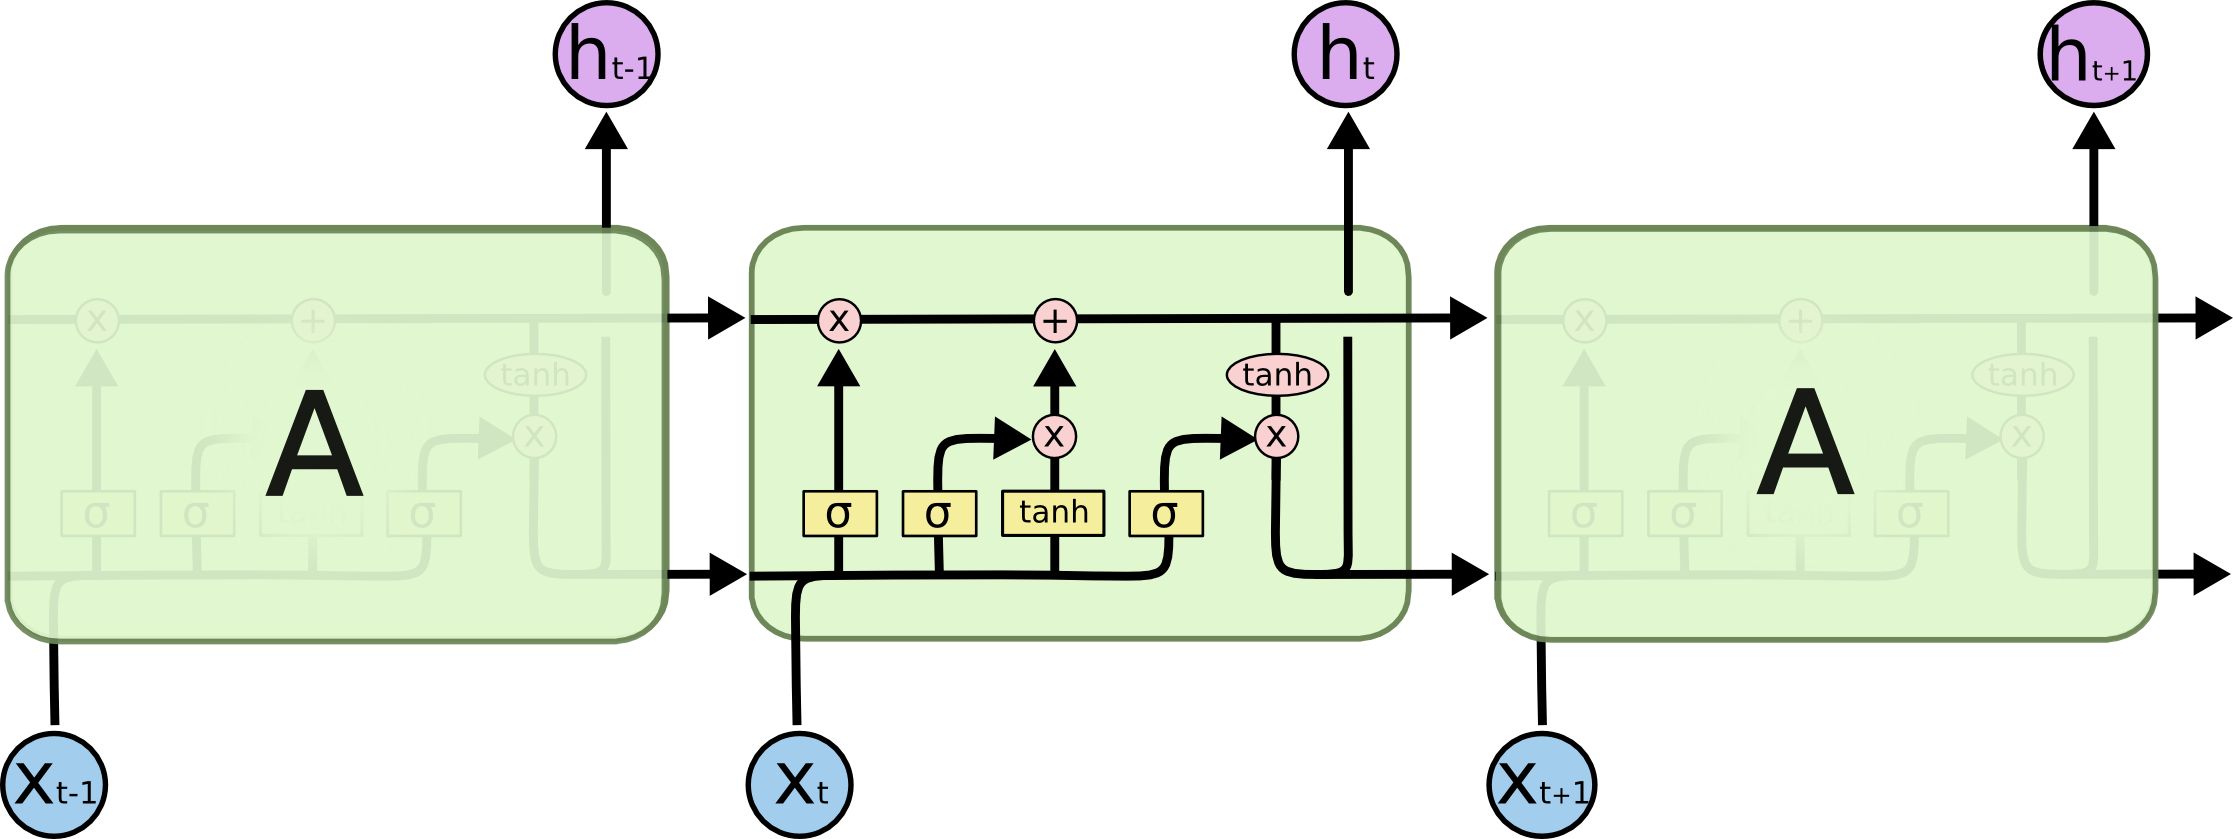

In [ ]:
# Load the TensorBoard notebook extension
%load_ext tensorboard
# Clear any logs from previous runs
!rm -rf ./logs/ 

TrainingEpochs  = 20
TrainingDays    = 50
PredictDays     = TrainingDays + 10 

# import libaries


In [ ]:
import tensorflow as tf
import datetime as dt
from datetime import date, timedelta
import math
#from pandas_datareader import data 
import pandas_datareader.data as web
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
plt.style.use('fivethirtyeight')

# Get today's date 
today = date.today() 
print("Today is: ", today) 
  
# Yesterday date 
yesterday = today - timedelta(days = 1) 
print("Yesterday was: ", yesterday) 

# get the stock quote



In [ ]:
start = dt.datetime(2010,1,26)
end = today     #yesterday   #today
MyStock = "QQQ"

stock = web.DataReader(MyStock,'yahoo', start, end)

In [ ]:
stock
stock.shape

In [ ]:
plt.figure(figsize=(16,8))
plt.title('Stock Closing Price History')
plt.plot(stock['Close'])

In [ ]:
plt.figure(figsize=(16,8))
plt.title('Stock Volume History')
plt.plot(stock['Volume'])

In [ ]:
data=stock.filter(['Close','Volume']);
# convert the dataframe to numpy array
dataset = data.values;
# get the number of rwos to train on
training_data_len = len(dataset) - PredictDays   #math.ceil(len(dataset)*0.8)
training_data_len

In [ ]:
dataset.shape

In [ ]:
# scale the data
scaler =MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
#scaled_data

In [ ]:
#create training dataset
train_data = scaled_data[0:training_data_len,:]
#split the dataset to x_train and y_train datasets
x_train=[]
y_train=[]
training_data_size = TrainingDays
for i in range(training_data_size,len(train_data)):
  x_train.append(train_data[i-training_data_size:i,:])
  y_train.append(train_data[i,0])
 



In [ ]:
# convert x_train, y_train to numpy array
x_train, y_train = np.array(x_train), np.array(y_train)
# reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1],x_train.shape[2]))
x_train.shape


In [ ]:
x_train.shape[1]

In [ ]:
y_train.shape

Create model and add layers

In [ ]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1],x_train.shape[2])))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [ ]:
#compile model
model.compile(optimizer="adam",loss='mean_squared_error')

In [ ]:
log_dir = "logs/fit/" + dt.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)


In [ ]:
# training
model.fit(x_train,y_train,batch_size=1,epochs=TrainingEpochs,callbacks=[tensorboard_callback])


Start TensorBoard through the command line or within a notebook experience. The two interfaces are generally the same. In notebooks, use the %tensorboard line magic. On the command line, run the same command without "%".

In [ ]:
%tensorboard --logdir logs/fit

In [ ]:
# create the testing data set
test_data = scaled_data[training_data_len-training_data_size:,:]
# create data x_test, y_test
x_test=[]
y_test= dataset[training_data_len:,:]
for i in range (training_data_size, len(test_data)):
  x_test.append(test_data[i-training_data_size:i,:])



In [ ]:
#convert test data to numpy
x_test =np.array(x_test)

In [ ]:
# reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],x_test.shape[2]))
x_test.shape

In [ ]:
# get the model predict price values
predictions = model.predict(x_test)
scaler.min_,scaler.scale_= scaler.min_[0],scaler.scale_[0]
predictions = scaler.inverse_transform(predictions)



In [ ]:
# get the root mean squared error (RMSE)
rmse = np.sqrt(mean_squared_error(predictions,y_test[:,0]))
rmse

In [ ]:
# plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions']=predictions
valid.shape

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','Close','Predictions'],loc='lower right')
plt.xlabel('Date')
plt.ylabel('USD')
plt.show


In [ ]:
# show the valid and predicted prices
plt.figure(figsize=(16,8))
plt.plot(valid[['Close','Predictions']])
plt.legend(['Close','Predictions'],loc='lower right')
plt.xlabel('Date')
plt.ylabel('USD')
plt.show

In [ ]:
start1 = dt.datetime(2021,1,1)
end1 = today     #yesterday   #today
MyStock1 = "QQQ"

stock1 = web.DataReader(MyStock,'yahoo', start1, end1)

In [ ]:
#Create a new dataframe
new_df = stock1.filter(['Close','Volume'])
last_60_days_scaled=scaled_data[-TrainingDays:]
X_test=[]
X_test.append(last_60_days_scaled)
X_test=np.array(X_test)
#Reshape
X_test=np.reshape(X_test,(X_test.shape[0], X_test.shape[1],X_test.shape[2]))
pred_price = model.predict(X_test)
#Unscale
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

In [ ]:
# lets get the real quote
stock_real_quote = web.DataReader(MyStock, 
                       start='2021-2-12', 
                       end='2021-2-12', 
                       data_source='yahoo')
print(stock_real_quote['Close'])